In [ ]:
 #importing important libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Traicay/TraicayVN/train'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Traicay/TraicayVN/test'

In [ ]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150),batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size =(150,150), batch_size = 10, class_mode = 'categorical')

Found 2000 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


In [ ]:
train_dataset.class_indices

{'cachua': 0,
 'cam': 1,
 'chuoi': 2,
 'dua': 3,
 'duahau': 4,
 'dudu': 5,
 'mit': 6,
 'oi': 7,
 'saurieng': 8,
 'xoai': 9}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation ='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
200/200 [==============================] - 592s 3s/step - loss: 2.3472 - accuracy: 0.0965
Epoch 2/50
200/200 [==============================] - 193s 965ms/step - loss: 2.2605 - accuracy: 0.1560
Epoch 3/50
200/200 [==============================] - 202s 1s/step - loss: 2.0409 - accuracy: 0.2535
Epoch 4/50
200/200 [==============================] - 201s 1s/step - loss: 1.8253 - accuracy: 0.3335
Epoch 5/50
200/200 [==============================] - 202s 1s/step - loss: 1.6688 - accuracy: 0.3970
Epoch 6/50
200/200 [==============================] - 201s 1s/step - loss: 1.5713 - accuracy: 0.4325
Epoch 7/50
200/200 [==============================] - 201s 1s/step - loss: 1.4490 - accuracy: 0.4870
Epoch 8/50
200/200 [==============================] - 204s 1s/step - loss: 1.3154 - accuracy: 0.5410
Epoch 9/50
200/200 [==============================] - 203s 1s/step - loss: 1.2434 - accuracy: 0.5550
Epoch 10/50
200/200 [==============================] - 203s 1s/step - loss: 1.1376 - acc

In [ ]:
model.save('/content/drive/MyDrive/Fruittrain/Fruittrain.h5')

In [ ]:
Fruittrain_model = load_model('/content/drive/MyDrive/Fruittrain/Fruittrain.h5')

In [ ]:
score=Fruittrain_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

ValueError: ignored

KeyError: ignored

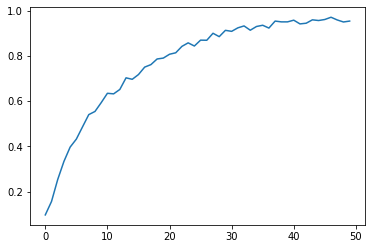

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Object:  dua


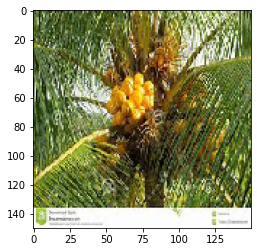

In [ ]:
img = load_img('/content/drive/MyDrive/Traicay/TraicayVN/train/dua/100.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['chomchom',
 'coc',
 'dao',
 'dua',
 'man',
 'mangcut',
 'oi',
 'tao',
 'vusua',
 'xoai']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])


Object:  vusua


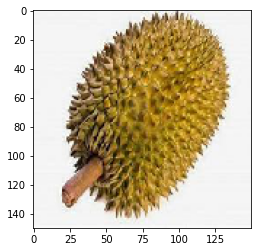

In [ ]:
img = load_img('/content/drive/MyDrive/Traicay/TraicayVN/train/saurieng/100.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['chomchom',
 'coc',
 'dao',
 'dua',
 'man',
 'mangcut',
 'oi',
 'tao',
 'vusua',
 'xoai']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])

Object:  dao


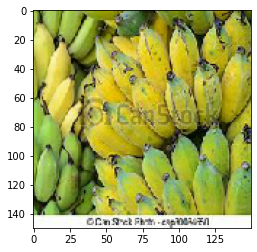

In [ ]:
img = load_img('/content/drive/MyDrive/Traicay/TraicayVN/train/chuoi/100.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label =['chomchom',
 'coc',
 'dao',
 'dua',
 'man',
 'mangcut',
 'oi',
 'tao',
 'vusua',
 'xoai']
print('Object: ',Label[int(np.argmax(Fruittrain_model.predict(img),axis=-1))])